In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
from lstm_model import build_model, train_model, save_lstm_model, load_lstm_model
from models.lstm_v2.lstm_normalize import get_lstm_data
from utils.chart import config_chart, plot_model_performance, plot_scatter_data, plot_distribution_data
from constants import SP500_TICKER
# import tensorflow as tf


---

## For **build_model** function

In [3]:
model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 124)               63984     
                                                                 
 dense (Dense)               (None, 64)                8000      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 35)                2275      
                                                                 
 dense_3 (Dense)             (None, 1)                 36        
                                                                 
 reshape (Reshape)           (None, 1, 1)              0         
                                                                 
Total params: 78455 (306.46 KB)
Trainable params: 78455

---

## For **train_model** function

In [4]:
train, test, predict = get_lstm_data(SP500_TICKER)

x_train = train['x']
y_train = train['y']
x_dates_train = train['x_dates']
y_dates_train = train['y_dates']

x_test = test['x']
y_test = test['y']
x_dates_test = test['x_dates']
y_dates_test = test['y_dates']

x_predict = predict['x']
y_predict = predict['y']
x_dates_predict = predict['x_dates']
y_dates_predict = predict['y_dates']

In [5]:
print(x_train.shape)
print(y_train.shape)

(4832, 15, 4)
(4832, 1, 1)


In [6]:
print(x_test.shape)
print(y_test.shape)

(604, 15, 4)
(604, 1, 1)


In [7]:
# plt = config_chart('Model Data')
# plt.plot(y_dates_train[:, 0], y_train[:, 0])
# plt.plot(y_dates_test[:, 0], y_test[:, 0])
# plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
# plt.legend(['Train', 'Test','Predict'])

Epoch 1/200


151/151 - 3s - loss: 0.0135 - mean_absolute_error: 0.0684 - 3s/epoch - 17ms/step
Epoch 2/200
151/151 - 1s - loss: 0.0028 - mean_absolute_error: 0.0376 - 704ms/epoch - 5ms/step
Epoch 3/200
151/151 - 1s - loss: 0.0026 - mean_absolute_error: 0.0361 - 693ms/epoch - 5ms/step
Epoch 4/200
151/151 - 1s - loss: 0.0026 - mean_absolute_error: 0.0361 - 699ms/epoch - 5ms/step
Epoch 5/200
151/151 - 1s - loss: 0.0027 - mean_absolute_error: 0.0367 - 721ms/epoch - 5ms/step
Epoch 6/200
151/151 - 1s - loss: 0.0027 - mean_absolute_error: 0.0362 - 684ms/epoch - 5ms/step
Epoch 7/200
151/151 - 1s - loss: 0.0027 - mean_absolute_error: 0.0364 - 749ms/epoch - 5ms/step
Epoch 8/200
151/151 - 1s - loss: 0.0026 - mean_absolute_error: 0.0360 - 803ms/epoch - 5ms/step
Epoch 9/200
151/151 - 1s - loss: 0.0027 - mean_absolute_error: 0.0362 - 731ms/epoch - 5ms/step
Epoch 10/200
151/151 - 1s - loss: 0.0026 - mean_absolute_error: 0.0361 - 750ms/epoch - 5ms/step
Epoch 11/200
151/151 - 1s - loss: 0.0026 - mean_a

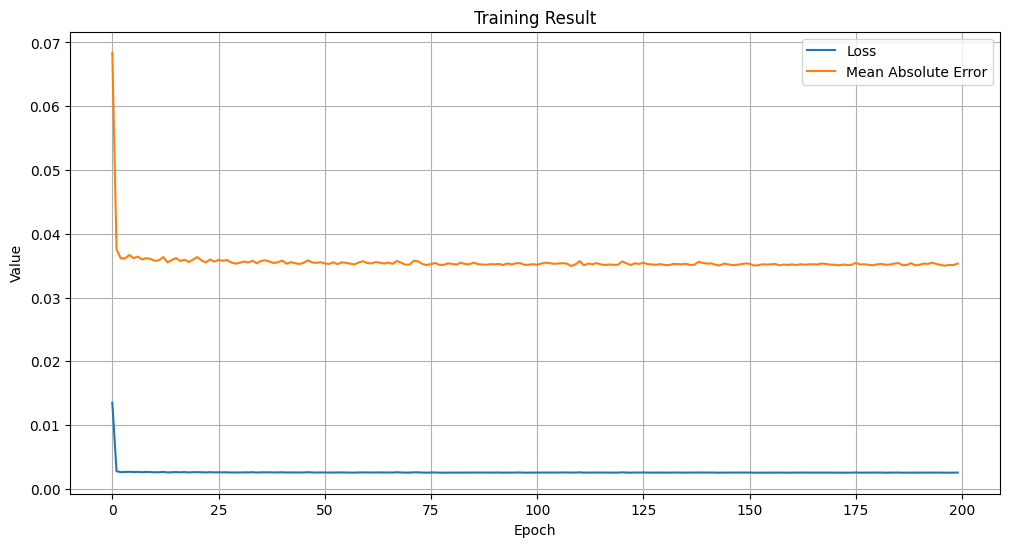

INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


INFO:tensorflow:Assets written to: ./models/lstm_v2/lstm_model_v2\assets


In [8]:
model, fit_result, evaluate_result = train_model(x_train, x_test, y_train, y_test)
plot_model_performance(fit_result)
save_lstm_model(model)

In [9]:
model = load_lstm_model()

19/19 [==============================] - 0s 3ms/step


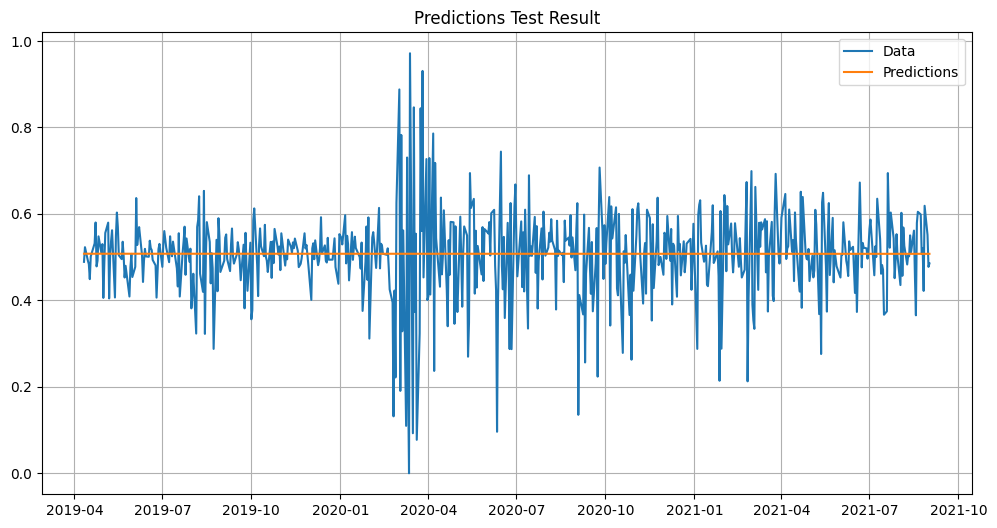

In [10]:
predictions = model.predict(x_test)

plt = config_chart('Predictions Test Result')
plt.plot(y_dates_test[:, 0], y_test[:, 0])
plt.plot(y_dates_test[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

19/19 [==============================] - 0s 3ms/step


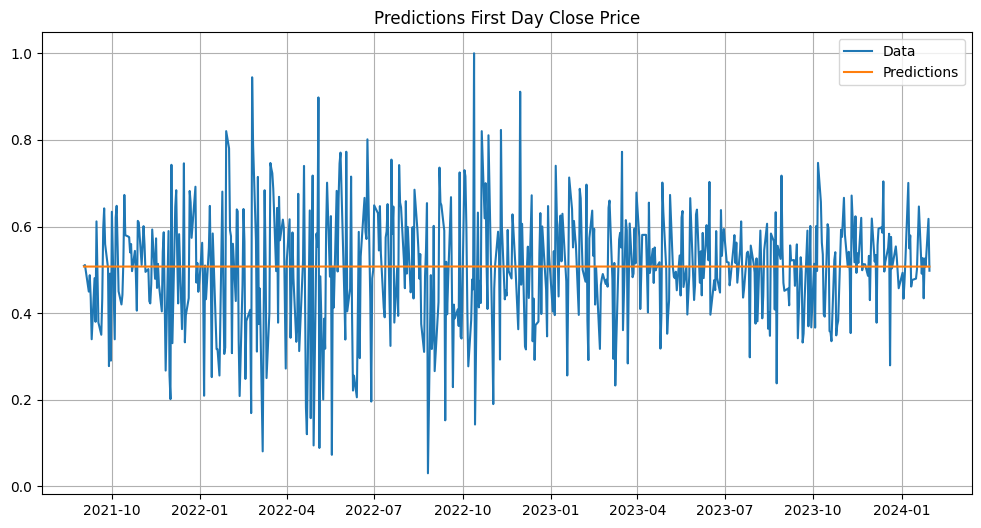

In [11]:
predictions = model.predict(x_predict)

plt = config_chart('Predictions First Day Close Price')
plt.plot(y_dates_predict[:, 0], y_predict[:, 0])
plt.plot(y_dates_predict[:, 0], predictions[:, 0])
plt.legend(['Data', 'Predictions'])

605
605


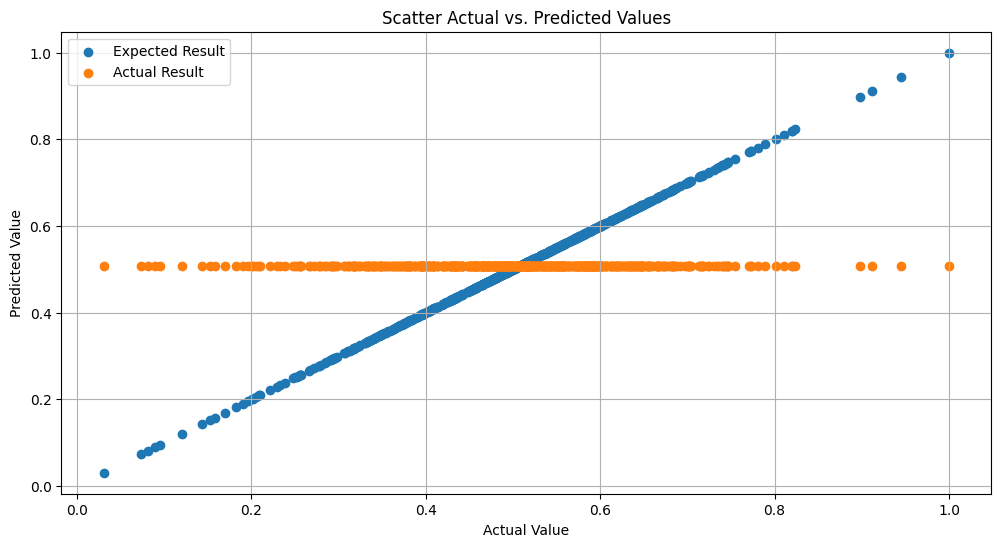

In [12]:
print(len(y_predict))
print(len(predictions))
plot_scatter_data(y_predict, predictions)

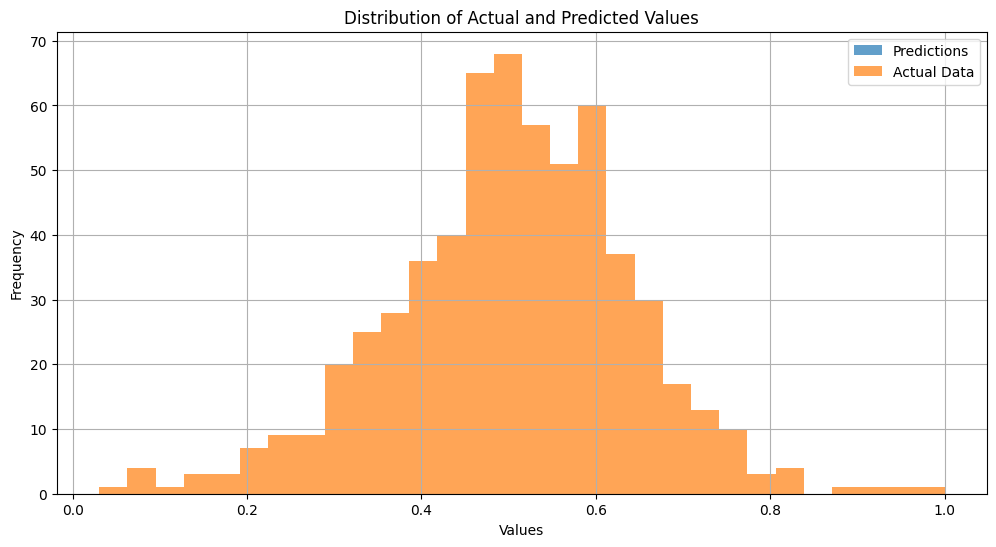

In [13]:
plot_distribution_data(y_predict[:, 0].flatten(), predictions[:, 0].flatten())

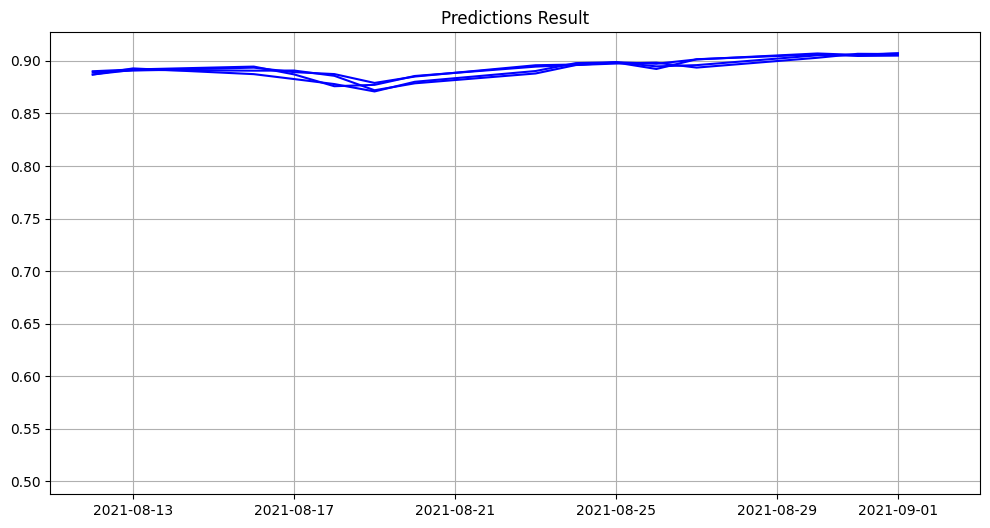

In [14]:
index = 0

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')
# plt.legend(['Data', 'Real', 'Predictions'])

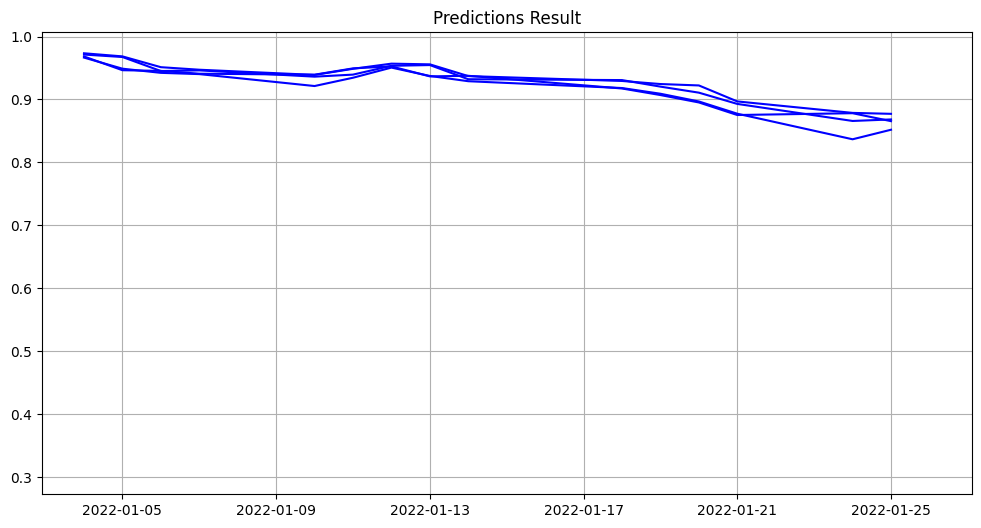

In [15]:
index = 100

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

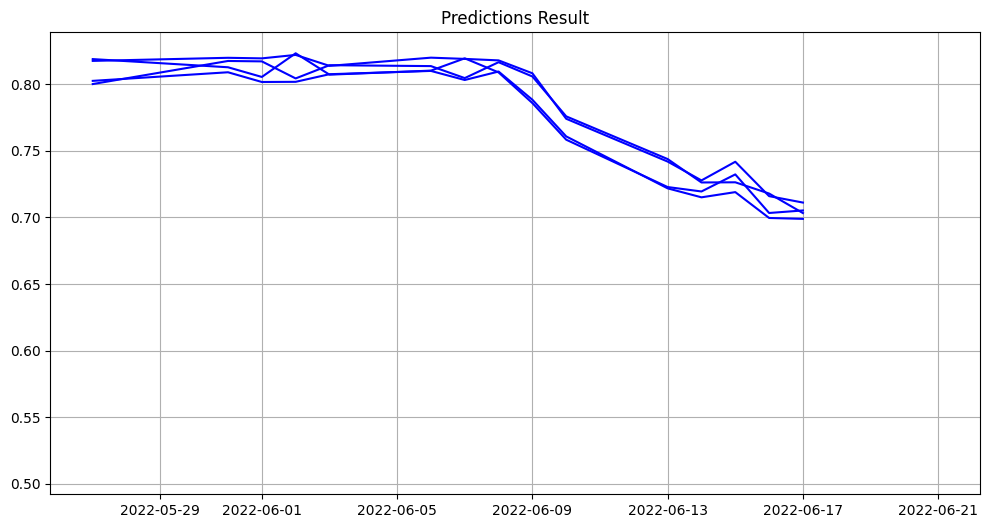

In [16]:
index = 200

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

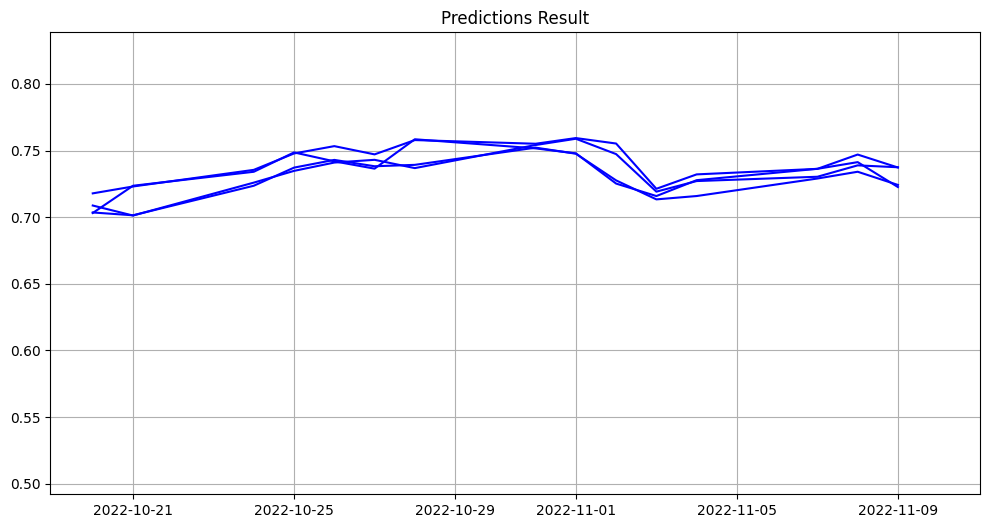

In [17]:
index = 300

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

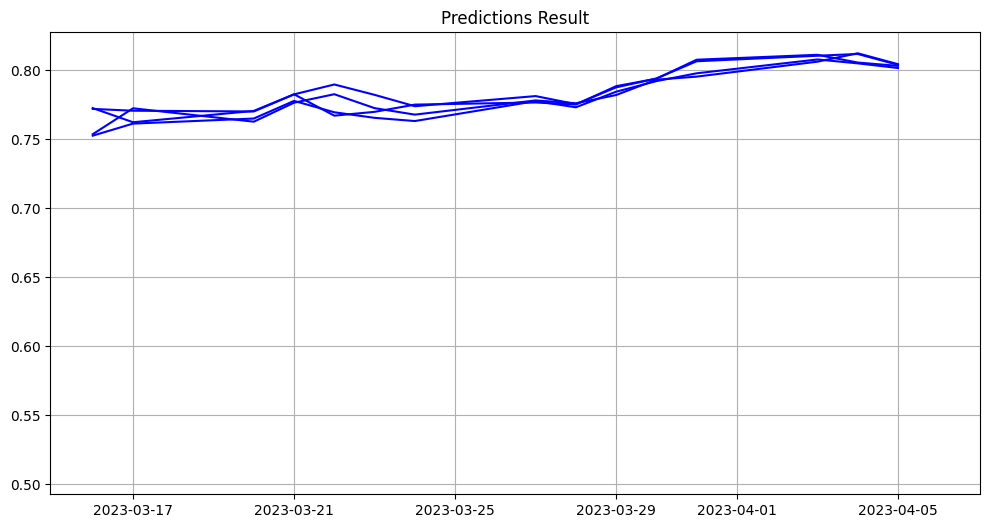

In [18]:
index = 400

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

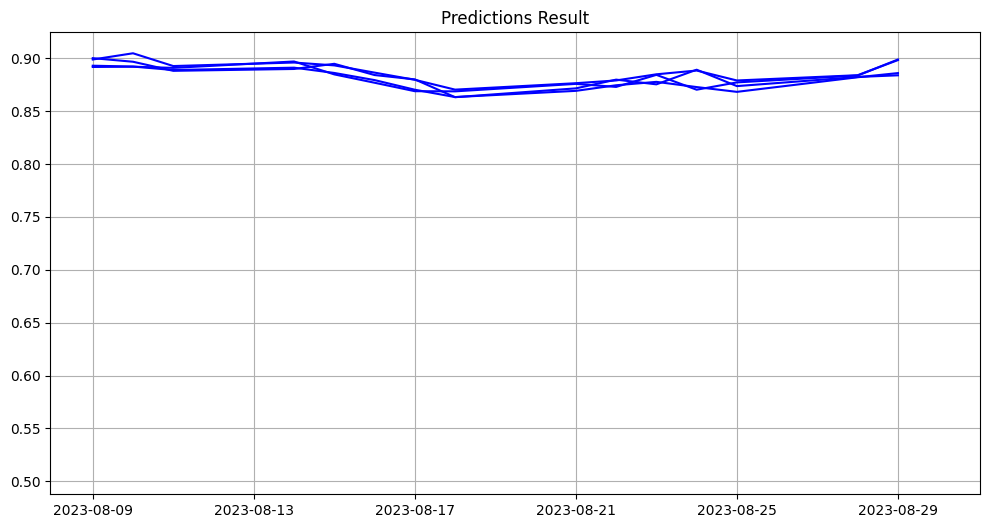

In [19]:
index = 500

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')

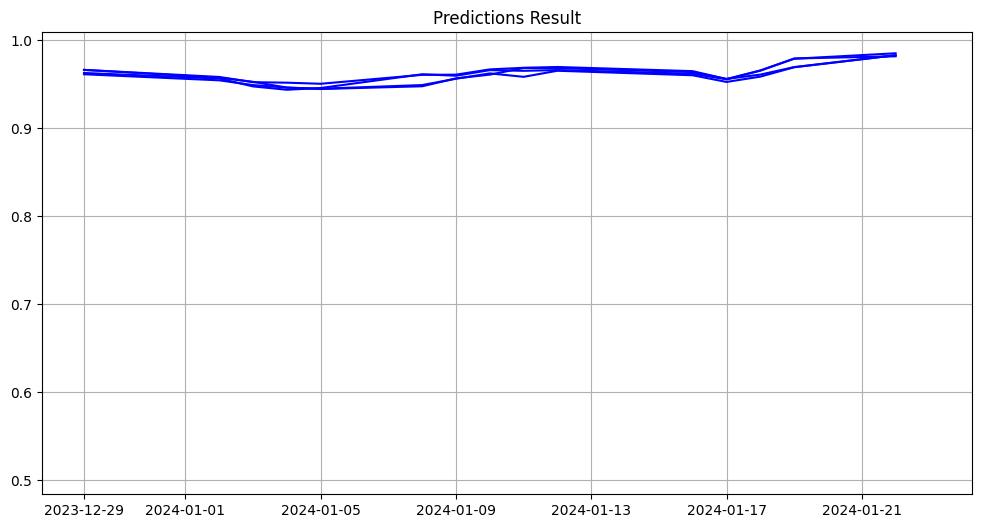

In [20]:
index = 599

plt = config_chart('Predictions Result')
plt.plot(x_dates_predict[index], x_predict[index], color='blue')
plt.plot(y_dates_predict[index], y_predict[index], color='green')
plt.plot(y_dates_predict[index], predictions[index], color='red')